# Extraccion de datos Anómalos y Datos faltantes

En el presente ejercicio, se eliminaran aproximadamente 500 registros al Azar para luego completar estos datos mediante algoritmos de Machine Learning. Además, se eliminarán datos Anómalos para de igual manera cambiarlos por valores mas ajustados mediante Machine Learning.

Los datos Usados se obtuvieron de:  https://www.kaggle.com/datasets/sameep98/housing-prices-in-mumbai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor #Modelo ML

In [2]:
# Cargando los datos bases
datos = pd.read_csv("Mumbai1.csv")

In [3]:
# Extrayendo las Columnas con las que se trabajará

datos_casas = datos[["No. of Bedrooms", "Area" ,"Price"]]
datos_casas.columns = ["NroHabitaciones", "Area", "Precio"]
datos_casas.head()

,NroHabitaciones,Area,Precio
0,1,720,4850000
1,1,600,4500000
2,1,650,6700000
3,1,650,4500000
4,1,665,5000000


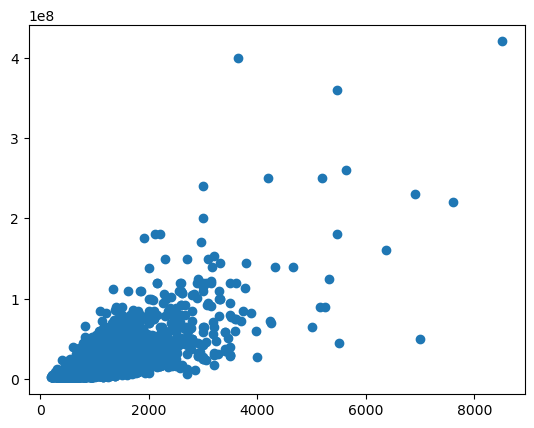

In [4]:
plt.scatter(x=datos_casas["Area"], y=datos_casas["Precio"])
plt.show()

-------------------

# Eliminando Aproximadamente 500 Precios de filas aleatorias

Nota: Son Aproximadamente 500 registros porque al generar numeros aleatorios pueden repetirsen algunos numeros.  
Estos datos se predeciran mas adelante con un algoritmo de Machine Learning.

In [5]:
num_max = datos_casas.shape[0]
num_aleatorios = np.random.randint(0, num_max, size = 500)
num_aleatorios = np.sort(num_aleatorios)
#num_aleatorios

In [6]:
for i in num_aleatorios:
    datos_casas.loc[i]["Precio"] = 0

-----------

# Buscando Datos Anómalos

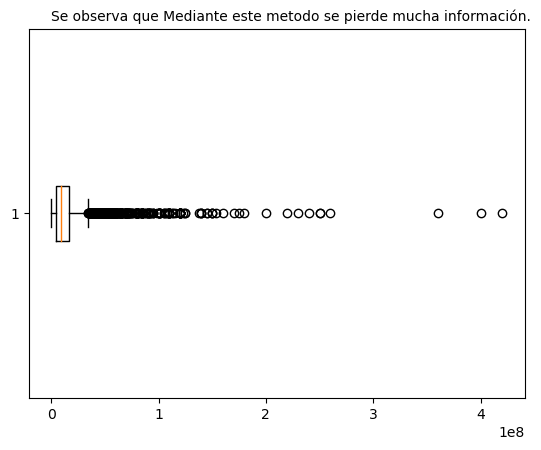

In [7]:
# Datos Anomalos Por Diagrama de Caja y Bigotes
plt.boxplot(datos_casas["Precio"], vert=False)
plt.text(x=1, y=1.52, s="Se observa que Mediante este metodo se pierde mucha información.")
plt.show()

### Graficamente se Analiza que un buen limite donde hay densidad de información se encuentra en:
    * Precio menor a 2 exp10 US

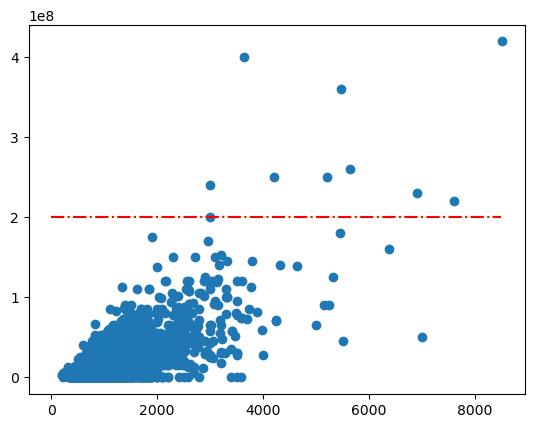

In [8]:
plt.scatter(x=datos_casas["Area"], y=datos_casas["Precio"])
plt.hlines(2*(10**8), 0, 8500 ,color="red", linestyle ="-.")
plt.show()

# Eliminando datos Anómalos o Outliers

In [9]:
#CAMBIANDO DATOS ANÓMALOS POR CEROS
for i in datos_casas.index:
    
    if datos_casas.loc[i]["Precio"] > 2*(10**8):
        datos_casas.loc[i]["Precio"] = 0       

--------------------------

### GRAFICANDO LOS DATOS

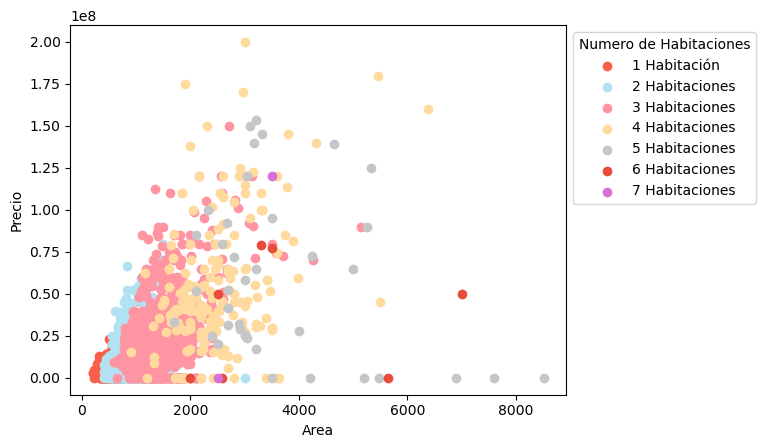

In [10]:
plt.scatter(x=datos_casas["Area"][datos_casas["NroHabitaciones"]==1], y=datos_casas["Precio"][datos_casas["NroHabitaciones"]==1], 
            color="#fa5f49", label="1 Habitación")

plt.scatter(x=datos_casas["Area"][datos_casas["NroHabitaciones"]==2], y=datos_casas["Precio"][datos_casas["NroHabitaciones"]==2], 
            color="#b2e2f2", label="2 Habitaciones")

plt.scatter(x=datos_casas["Area"][datos_casas["NroHabitaciones"]==3], y=datos_casas["Precio"][datos_casas["NroHabitaciones"]==3], 
            color="#ff94a2", label="3 Habitaciones")

plt.scatter(x=datos_casas["Area"][datos_casas["NroHabitaciones"]==4], y=datos_casas["Precio"][datos_casas["NroHabitaciones"]==4], 
            color="#ffda9e", label="4 Habitaciones")

plt.scatter(x=datos_casas["Area"][datos_casas["NroHabitaciones"]==5], y=datos_casas["Precio"][datos_casas["NroHabitaciones"]==5], 
            color="#c5c6c8", label="5 Habitaciones")

plt.scatter(x=datos_casas["Area"][datos_casas["NroHabitaciones"]==6], y=datos_casas["Precio"][datos_casas["NroHabitaciones"]==6], 
            color="#E74C3C", label="6 Habitaciones")

plt.scatter(x=datos_casas["Area"][datos_casas["NroHabitaciones"]==7], y=datos_casas["Precio"][datos_casas["NroHabitaciones"]==7], 
            color="#DA70D6", label="7 Habitaciones")

plt.ylabel("Precio")
plt.xlabel("Area")
plt.legend(title="Numero de Habitaciones", bbox_to_anchor=(1, 1))
plt.show()

-----------

# Completando Datos mediante K-Vecinos Mas cercanos

### EXTRAYENDO LOS DATOS FALTANTES O IGUALES A CERO COMO DATOS A COMPLETAR

In [11]:
datos_faltantes = datos_casas[(datos_casas["Precio"] == 0)][["NroHabitaciones","Area"]]

#Escalando los datos a predecir
escalador = preprocessing.MinMaxScaler()
datos_faltantes_escalados = escalador.fit_transform(datos_faltantes)

In [12]:
datos_casas = datos_casas.drop(datos_casas[datos_casas["Precio"] == 0].index)

### Obteniendo los datos para el Modelo

In [13]:
x = datos_casas[["NroHabitaciones", "Area"]]
y = datos_casas["Precio"]

In [14]:
### Escalando los Datos
escalador = preprocessing.MinMaxScaler()
x = escalador.fit_transform(x)

In [15]:
### Entrenando el algoritmo
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x,y)

KNeighborsRegressor()

### Realizando las predicciones y Completando los datos resultantes en el DataSet

In [16]:
predicciones = knn.predict(datos_faltantes_escalados)

In [17]:
datos_faltantes["Precio_Predecido"] = predicciones
datos_faltantes

,NroHabitaciones,Area,Precio_Predecido
9,3,1680,28300000.0
20,2,1150,16320000.0
41,1,650,5040000.0
54,1,610,7390000.0
81,1,655,7041999.8
...,...,...,...
6287,4,2000,51880000.0
6292,2,1150,16320000.0
6299,1,750,4324000.0
6322,1,610,7390000.0


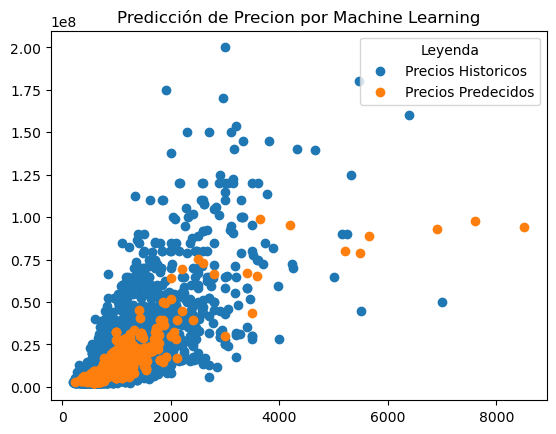

In [21]:
plt.scatter(x=datos_casas["Area"], y=datos_casas["Precio"])
plt.scatter(x=datos_faltantes["Area"], y=datos_faltantes["Precio_Predecido"])
plt.title("Predicción de Precion por Machine Learning")
plt.legend(["Precios Historicos","Precios Predecidos"], title="Leyenda")
plt.show()

## CONCLUSION
    * Se puede observar que los precios predecidos basados en el Area y Numero de habitaciones de una casa son consistentes con los datos historicos usados como prueba. Graficamente se analiza que son datos confiables basados en los precios de los datos cercanos al dato predecido, por lo que el resultando en confiable según lo esperado.
    
    * El algoritmo K vecinos Cercanos es un buen algoritmo de prediccion cuando se cuenta con volumenes completos de datos historicos con los cuales hacer la Regresión. Sin embargo se pueden usar otros algoritmos para realizar la regresión respectiva tales como:
    
        * Arboles de desición
        * Bosques Aleatorios
        * Regresiones Lineales y Polinomiales
        * Vectores de Soporte